In [1]:
import pandas as pd

In [2]:
pos_df = pd.read_csv("./datasets/pos_english_text.csv", encoding="latin")
neg_df = pd.read_csv("./datasets/neg_english_text.csv", encoding="latin")
raw_df = pd.concat([pos_df, neg_df])
raw_df

,sentiment,text
0,4,I LOVE @Health4UandPets u guys r the best!!
1,4,im meeting up with one of my besties tonight! ...
2,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,4,Being sick can be really cheap when it hurts t...
4,4,@LovesBrooklyn2 he has that effect on everyone
...,...,...
799994,0,Sick Spending my day laying in bed listening ...
799995,0,Gmail is down?
799996,0,rest in peace Farrah! So sad
799997,0,@Eric_Urbane Sounds like a rival is flagging y...


In [3]:
lab_to_sentiment = {0: "Negative", 4: "Positive"}


def label_decoder(label):
    return lab_to_sentiment[label]


raw_df.sentiment = raw_df.sentiment.apply(lambda x: label_decoder(x))
raw_df

,sentiment,text
0,Positive,I LOVE @Health4UandPets u guys r the best!!
1,Positive,im meeting up with one of my besties tonight! ...
2,Positive,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,Positive,Being sick can be really cheap when it hurts t...
4,Positive,@LovesBrooklyn2 he has that effect on everyone
...,...,...
799994,Negative,Sick Spending my day laying in bed listening ...
799995,Negative,Gmail is down?
799996,Negative,rest in peace Farrah! So sad
799997,Negative,@Eric_Urbane Sounds like a rival is flagging y...


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599999 entries, 0 to 799998
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  object
 1   text       1599999 non-null  object
dtypes: object(2)
memory usage: 36.6+ MB


In [5]:
raw_df.describe()

,sentiment,text
count,1599999,1599999
unique,2,1581465
top,Positive,isPlayer Has Died! Sorry
freq,800000,210


In [6]:
raw_df.drop_duplicates(inplace=True)
raw_df.describe().T

,count,unique,top,freq
sentiment,1583690,2,Positive,793506
text,1583690,1581465,@kezzawezz Yaba! Enjoy your time doon there.....,2


In [7]:
raw_df.groupby(['sentiment']).size().reset_index(name='counts')

,sentiment,counts
0,Negative,790184
1,Positive,793506


In [8]:
abbreviations_df = pd.read_csv("./datasets/abbreviations.csv")
apostrophe_df = pd.read_csv("./datasets/apostrophe.csv")
emoji_df = pd.read_csv("./datasets/emoji.csv")
emoticons_df = pd.read_csv("./datasets/emoticons.csv")

In [10]:
abbreviations_dict = dict(abbreviations_df.values)
apostrophe_dict = dict(apostrophe_df.values)
emoji_dict = dict(emoji_df.values)
emoticons_dict = dict(emoticons_df.values)

In [11]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary and word.lower() in text.split():
            text = text.replace(word, dictionary[word.lower()])
    return text

In [12]:
def translate(input_text):
    from googletrans import Translator
    translator = Translator()
    text = translator.translate(input_text).text
    return str(text)

In [13]:
def preProcessing(input_text, isSpellCheck=False, isTranslate=False):
    # Step A : Converting html entities i.e. (&lt; &gt; &amp;)
    import html
    text = html.unescape(input_text)
    # Step B : Removing "@user" from all the tweets
    import re
    text = re.sub("@[\w]*", "", text)
    # Step C : Remove http & https links
    text = re.sub("http://\S+|https://\S+", "", text)
    # Step D: Translation
    if isTranslate:
        text = translate(text)
    # Step E : Emoticon Lookup
    text = lookup_dict(text, emoticons_dict)
    # Step F : Emoji Lookup
    text = lookup_dict(text, emoji_dict)
    # Step G : Changing all the tweets into lowercase
    text = text.lower()
    # Step H : Apostrophe Lookup
    text = lookup_dict(text, apostrophe_dict)
    # Step I : Short Word Lookup
    text = lookup_dict(text, abbreviations_dict)
    # Step K : Replacing Punctuations with space
    text = re.sub(r"[^\w\s]", " ", text)
    # Step L : Replacing Special Characters & Numbers (integers) with space
    text = re.sub(r"[^a-zA-Z]", " ", text)
    # Step M : Spelling Correction - With TextBlob Library
    if isSpellCheck:
        from textblob import TextBlob
        text = str(TextBlob(text).correct())
    # Step N: Remove whitespace
    text = re.sub(r"\s+", " ", text)

    return text

In [14]:
from tqdm import tqdm
tqdm.pandas()

In [15]:
raw_df = raw_df.sample(1000)

In [16]:
raw_df['clear_text'] = raw_df['text'].progress_apply(lambda x: preProcessing(x))
raw_df.head()

100%|██████████| 1000/1000 [00:00<00:00, 8813.95it/s]


,sentiment,text,clear_text
410758,Positive,In school english lit this morning!!!,in school english lit this morning
313826,Negative,so hungry &amp; out of food,so hungry out of food
278860,Positive,I'm now following Liz Taylor.... I hope that's...,i m now following liz taylor i hope that is ok...
640371,Negative,ahhh sorrrryyyy for all the unanswered phone c...,ahhh sorrrryyyy for all the unanswered phone c...
279130,Positive,@kathyireland I google my twit &amp; found mys...,i google my twit found myslf on odd lists sai...


In [17]:
pd.set_option('display.max_colwidth', None)
raw_df[["text", "clear_text"]].sample(20)

,text,clear_text
682257,"Last breakfast with my hubby.HeÃÂ´s going on a business trip to Taiwan today, IÃÂ´ll feel sooo lonely!",last breakfast with my hubby he s going on a business trip to taiwan today i ll feel sooo lonely
225509,And then thebirthday ended badly with me alone In a bar,and then thebirthday ended badly with me alone in a bar
654026,@paperbyfmn I took your advice,i took your advice
547295,@gaztrue you've gotta start somewhere to get where you're going. keep up the good work and keep fighting. i know you will!,you have got to start somewhere to get where you are going keep up the good work and keep fighting i know you will
444902,hanging out with @summerglo,hanging out with
234769,my fingers smell of garlic,my fingers smell of garlic
141829,Finally attempting to go to bed with Azima while Ruhee is on the floor.,finally attempting to go to bed with azima while ruhee is on the floor
723613,"@jalapenosite that sounds tooo maaachhh!! all the sacrifices lol... just relax and observe, that is the best way to learn",that sounds tooo maaachhh all the sacrifices lol just relax and observe that is the best where are you to learn
45317,Madness with blogging drive. Why?! 3AM,madness with blogging drive why am
449273,Losing my voice.,losing my voice


In [18]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def tokenize(clean_text):
    tokens = word_tokenize(clean_text)
    stop_words = set(stopwords.words("english"))
    negation_words = [
        "not",
        "never",
        "neither",
        "nor",
        "barely",
        "hardly",
        "scarcely",
        "seldom",
        "rarely",
        "no",
        "nothing",
        "none",
        "nobody",
        "nowhere",
    ]
    return [token for token in tokens if token in negation_words or token not in stop_words]

In [19]:
raw_df['tokens'] = raw_df['clear_text'].progress_apply(lambda x: tokenize(x))
raw_df.head()

100%|██████████| 1000/1000 [00:01<00:00, 701.12it/s]


,sentiment,text,clear_text,tokens
410758,Positive,In school english lit this morning!!!,in school english lit this morning,"[school, english, lit, morning]"
313826,Negative,so hungry &amp; out of food,so hungry out of food,"[hungry, food]"
278860,Positive,I'm now following Liz Taylor.... I hope that's ok under my restraining order,i m now following liz taylor i hope that is ok under my restraining order,"[following, liz, taylor, hope, ok, restraining, order]"
640371,Negative,ahhh sorrrryyyy for all the unanswered phone calls/text!!! i left my phone at home all day,ahhh sorrrryyyy for all the unanswered phone calls text i left my phone at home all day,"[ahhh, sorrrryyyy, unanswered, phone, calls, text, left, phone, home, day]"
279130,Positive,@kathyireland I google my twit &amp; found myslf on odd lists. 1 said I twit 2 muc @7 need to get a life. LOL. I'm a single mom. ALWAYS HOME!,i google my twit found myslf on odd lists said i twit muc need to get a life lol i m a single mom always home,"[google, twit, found, myslf, odd, lists, said, twit, muc, need, get, life, lol, single, mom, always, home]"


In [20]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    import nltk
    from nltk.corpus import wordnet

    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV,
    }

    return tag_dict.get(tag, wordnet.NOUN)

In [21]:
def Lemmatizer(tokens):
    # Importing library for lemmatizing
    from nltk.stem.wordnet import WordNetLemmatizer

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in tokens]

In [22]:
raw_df['lemmats'] = raw_df['tokens'].progress_apply(lambda x: Lemmatizer(x))
raw_df.head()

100%|██████████| 1000/1000 [00:34<00:00, 29.36it/s]


,sentiment,text,clear_text,tokens,lemmats
410758,Positive,In school english lit this morning!!!,in school english lit this morning,"[school, english, lit, morning]","[school, english, lit, morning]"
313826,Negative,so hungry &amp; out of food,so hungry out of food,"[hungry, food]","[hungry, food]"
278860,Positive,I'm now following Liz Taylor.... I hope that's ok under my restraining order,i m now following liz taylor i hope that is ok under my restraining order,"[following, liz, taylor, hope, ok, restraining, order]","[follow, liz, taylor, hope, ok, restrain, order]"
640371,Negative,ahhh sorrrryyyy for all the unanswered phone calls/text!!! i left my phone at home all day,ahhh sorrrryyyy for all the unanswered phone calls text i left my phone at home all day,"[ahhh, sorrrryyyy, unanswered, phone, calls, text, left, phone, home, day]","[ahhh, sorrrryyyy, unanswered, phone, call, text, left, phone, home, day]"
279130,Positive,@kathyireland I google my twit &amp; found myslf on odd lists. 1 said I twit 2 muc @7 need to get a life. LOL. I'm a single mom. ALWAYS HOME!,i google my twit found myslf on odd lists said i twit muc need to get a life lol i m a single mom always home,"[google, twit, found, myslf, odd, lists, said, twit, muc, need, get, life, lol, single, mom, always, home]","[google, twit, found, myslf, odd, list, say, twit, muc, need, get, life, lol, single, mom, always, home]"


In [23]:
raw_df.sample(10)

,sentiment,text,clear_text,tokens,lemmats
382077,Negative,havin a beer-can sandwich then headin off for dover all for a lil buffet and a moonbounce! no way in hell am i wearin a sumo suit!,havin a beer can sandwich then headin off for dover all for a lil buffet and a moonbounce no where are you in hell am i wearin a sumo suit,"[havin, beer, sandwich, headin, dover, lil, buffet, moonbounce, no, hell, wearin, sumo, suit]","[havin, beer, sandwich, headin, dover, lil, buffet, moonbounce, no, hell, wearin, sumo, suit]"
132713,Positive,lovin my new blackberry,lovin my new blackberry,"[lovin, new, blackberry]","[lovin, new, blackberry]"
631067,Positive,@shand0chit0 Hi Momma Frank! Remember me?,hi momma frank remember me,"[hi, momma, frank, remember]","[hi, momma, frank, remember]"
617885,Positive,@umahameed so lucky girl. Say hi to Big Ben for me pleaseee,so lucky girl say hi to big ben for me pleaseee,"[lucky, girl, say, hi, big, ben, pleaseee]","[lucky, girl, say, hi, big, ben, pleaseee]"
481219,Negative,Stuck in class.,stuck in class,"[stuck, class]","[stuck, class]"
502204,Negative,At the hospital with my baby fever,at the hospital with my baby fever,"[hospital, baby, fever]","[hospital, baby, fever]"
384885,Positive,Going to read 'The Boy in The Striped Pyjamas' Junior Cert exams are starting on wednesday.,going to read the boy in the striped pyjamas junior cert exams are starting on wednesday,"[going, read, boy, striped, pyjamas, junior, cert, exams, starting, wednesday]","[go, read, boy, strip, pyjama, junior, cert, exam, start, wednesday]"
58624,Negative,Shot himself in the foot OUCH!,shot himself in the foot ouch,"[shot, foot, ouch]","[shot, foot, ouch]"
657463,Negative,@Jasminexoxo Yeah i am sorry!,yeah i am sorry,"[yeah, sorry]","[yeah, sorry]"
21857,Positive,Have a couple hours to burn between jobs. . . Thinking beer.,have a couple hours to burn between jobs thinking beer,"[couple, hours, burn, jobs, thinking, beer]","[couple, hour, burn, job, think, beer]"


## Model training

In [24]:
df = pd.read_csv("./datasets/tokens.csv")

In [25]:
df = df.sample(1000)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df["lemmats"].apply(lambda x: "".join(x)),
    df["sentiment"],
    test_size=0.3,
    random_state=60,
    shuffle=True,
    stratify=df["sentiment"],
)
X_train

406937     ['love', 'heart', 'like', 'nd', 'rd', 'best', 'th', 'badly', 'write', 'bella', 'give', 'every', 'thing', 'stood']
278380                                                  ['law', 'enforcement', 'officer', 'allen', 'not', 'see', 'hmmmmmmm']
689725                                                           ['people', 'fui', 'see', 'ya', 'tomorrow', 'good', 'night']
902864                                           ['busy', 'sunday', 'ahead', 'problem', 'weather', 'isnt', 'ha', 'f', 'bad']
1015663                                    ['last', 'night', 'together', 'dad', 'play', 'air', 'guitar', 'hero', 'basement']
                                                                 ...                                                        
974188                                                      ['sick', 'friday', 'night', 'stay', 'home', 'tonighttt', 'lame']
758045                                                                                 ['possibly', 'go', 'chicago', 'july']


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_text = vectorizer.fit_transform(X_train)
tfidf_text

<700x2027 sparse matrix of type '<class 'numpy.float64'>'
	with 4967 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def model_result(clf, X_train, Y_train, X_test, Y_test):
    print(f"Clf: {clf}")
    model = Pipeline(
        [
            ("tfidf", TfidfVectorizer()),
            ("clf", clf)
        ]
    )
    model.fit(X_train, Y_train)
    test_predict = model.predict(X_test)

    train_accuracy = round(model.score(X_train, Y_train) * 100)
    test_accuracy = round(accuracy_score(test_predict, Y_test) * 100)

    print(f"Train Accuracy Score : {train_accuracy}% ")
    print(f"Test Accuracy Score  : {test_accuracy}% ")
    print(classification_report(test_predict, Y_test, target_names=["pos", "neg"]))

    cm = confusion_matrix(Y_test, test_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["pos", "neg"])
    disp.plot()
    plt.show()
    return model

Clf: MultinomialNB()
Train Accuracy Score : 96% 
Test Accuracy Score  : 73% 
              precision    recall  f1-score   support

         pos       0.81      0.72      0.76       177
         neg       0.65      0.76      0.70       123

    accuracy                           0.73       300
   macro avg       0.73      0.74      0.73       300
weighted avg       0.74      0.73      0.74       300



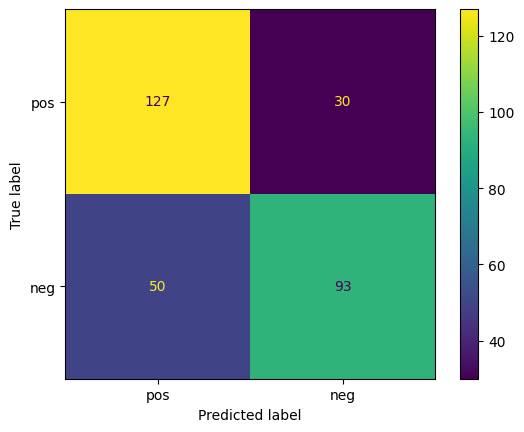

Clf: BernoulliNB()
Train Accuracy Score : 95% 
Test Accuracy Score  : 72% 
              precision    recall  f1-score   support

         pos       0.76      0.72      0.74       167
         neg       0.67      0.72      0.70       133

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



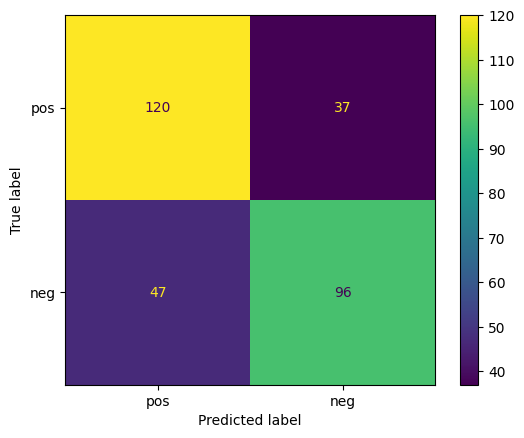

Clf: LogisticRegressionCV(cv=5, random_state=24)
Train Accuracy Score : 98% 
Test Accuracy Score  : 69% 
              precision    recall  f1-score   support

         pos       0.71      0.71      0.71       157
         neg       0.68      0.68      0.68       143

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



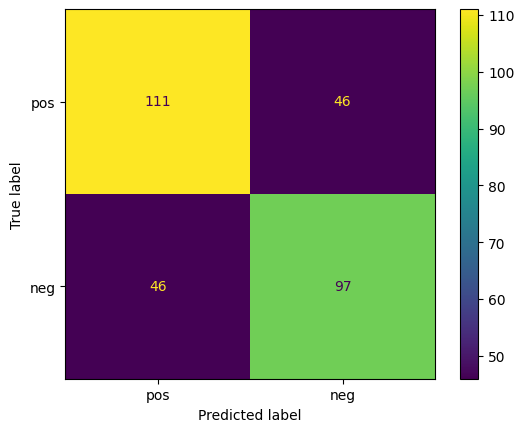

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn import svm

clfs = [
    MultinomialNB(),
    BernoulliNB(),
    LogisticRegressionCV(cv=5, random_state=24),
]

for clf in clfs:
    model_result(clf, X_train, Y_train, X_test, Y_test)

Clf: MultinomialNB()
Train Accuracy Score : 96% 
Test Accuracy Score  : 73% 
              precision    recall  f1-score   support

         pos       0.81      0.72      0.76       177
         neg       0.65      0.76      0.70       123

    accuracy                           0.73       300
   macro avg       0.73      0.74      0.73       300
weighted avg       0.74      0.73      0.74       300



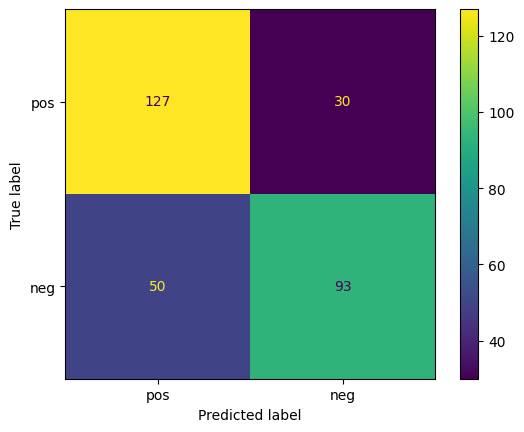

In [35]:
MNB = model_result(MultinomialNB(), X_train, Y_train, X_test, Y_test)

In [37]:
MNB.predict(["hello world"])[0]

4

In [45]:
input_text = input()
clean_text = preProcessing(input_text)
token = tokenize(clean_text)
lemat = Lemmatizer(token)

print(input_text)
if MNB.predict(lemat)[0] == 4:
    print("Positive")
else:
    print("Negative")

Happy birthday 🎉
Positive
